In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pathlib import Path
import os
import collections

ROOT_DIR = Path(os.environ.get('ROOT_DIR'))
DATA_DIR = ROOT_DIR / 'data'

from PIL import Image, ImageDraw, ImageFont
%matplotlib inline

In [2]:
from src.tournament import WorldCup

In [3]:
e = pickle.loads((DATA_DIR / 'models/elo_pickle.pkl').read_bytes())
wc = WorldCup(e)
for game, out in wc.playoffs.items():
    print(f"{game}: {str(out)}")

49: Iceland 0 - 1 Peru
50: Iran 1 - 0 Russia
51: Saudi Arabia 0 - 1 Spain
52: France 1 - 0 Croatia
53: South Korea 0 - 1 Peru
54: Senegal 0 - 1 England
55: Switzerland 0 - 1 Germany
56: Belgium 0 - 1 Colombia
57: Iran 1 - 0 Peru
58: England 0 - 1 Peru
59: Colombia 0 - 1 Germany
60: France 0 - 1 Spain
61: Peru 1 - 0 Iran
62: Spain 1 - 0 Germany
63: Germany 1 - 0 Iran
64: Spain 0 - 1 Peru


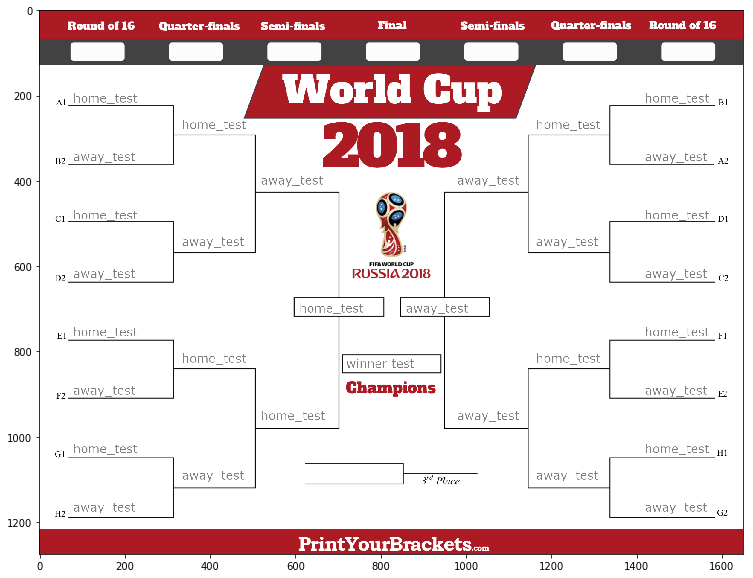

In [35]:
out = collections.namedtuple('out', 'home away home_score away_score winner')
bracket_dict = collections.defaultdict(lambda : out('home_test', 'away_test', 1, 2, 'winner test'))
# get an image
base = Image.open('../data/brackets/world-cup.png').convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("../data/brackets/Verdana.ttf",28)

# get a drawing context
d = ImageDraw.Draw(txt)
group_offset = 80
group_vertical_offset = 188
group_cycle = 137
quarter_offset = 335
quarter_vertical_offset = 250
quarter_cycle = 274
right_edge = base.size[0] - 150

# 1/8 finals
n = 0                                                    
for game_num in [50, 49, 53, 54]:
    home, away = bracket_dict[game_num].home, bracket_dict[game_num].away
    d.text((group_offset, group_vertical_offset + n*group_cycle), home, font=fnt, fill=(0,0,0,128))
    n +=1                                                 
    d.text((group_offset, group_vertical_offset + n*group_cycle), away, font=fnt, fill=(0,0,0,128))
    n +=1

n = 0
for game_num in [51, 52, 55, 56]:
    home, away = bracket_dict[game_num].home, bracket_dict[game_num].away
    d.text((right_edge - group_offset, group_vertical_offset + n*group_cycle), home, font=fnt, fill=(0,0,0,128))
    n +=1                                                 
    d.text((right_edge - group_offset, group_vertical_offset + n*group_cycle), away, font=fnt, fill=(0,0,0,128))
    n +=1

# 1/4 finals
n = 0
for game_num in [57, 58]:
    home, away = bracket_dict[game_num].home, bracket_dict[game_num].away
    d.text((quarter_offset, quarter_vertical_offset + n*quarter_cycle), home, font=fnt, fill=(0,0,0,128))
    n +=1                                                 
    d.text((quarter_offset, quarter_vertical_offset + n*quarter_cycle), away, font=fnt, fill=(0,0,0,128))
    n +=1

n = 0
for game_num in [60, 59]:
    home, away = bracket_dict[game_num].home, bracket_dict[game_num].away
    d.text((right_edge - quarter_offset, quarter_vertical_offset + n*quarter_cycle), home, font=fnt, fill=(0,0,0,128))
    n +=1                                                 
    d.text((right_edge - quarter_offset, quarter_vertical_offset + n*quarter_cycle), away, font=fnt, fill=(0,0,0,128))
    n +=1
    
# Semi finals

home, away = bracket_dict[61].home, bracket_dict[61].away
d.text((520, 380 + 552), home, font=fnt, fill=(0,0,0,128))
d.text((520, 380), away, font=fnt, fill=(0,0,0,128))

home, away = bracket_dict[62].home, bracket_dict[62].away
d.text((right_edge - 520, 380), away, font=fnt, fill=(0,0,0,128))
d.text((right_edge - 520, 380 + 552), away, font=fnt, fill=(0,0,0,128))    

# Final
semi1, semi2 = bracket_dict[64].home, bracket_dict[64].away
d.text((610, 680), semi1, font=fnt, fill=(0,0,0,128))
d.text((right_edge - 640, 680), away, font=fnt, fill=(0,0,0,128))

winner = bracket_dict[64].winner
d.text((720, 810), winner, font=fnt, fill=(0,0,0,128))

# Bronze final
semi1, semi2 = bracket_dict[63].home, bracket_dict[63].away
d.text((740, 680), semi1, font=fnt, fill=(0,0,0,128))
d.text((740, 680), away, font=fnt, fill=(0,0,0,128))

out = Image.alpha_composite(base, txt)


#out.show()
fig, ax = plt.subplots(figsize=(40, 10))
ax.imshow(np.asarray(out),);